<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/MovingMassSpringAndInductanceCapacitance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Mass-Spring vs Inductance-Capacitance</h1></b>

Dr. Bingsen Wang

3/15/2025
</center>

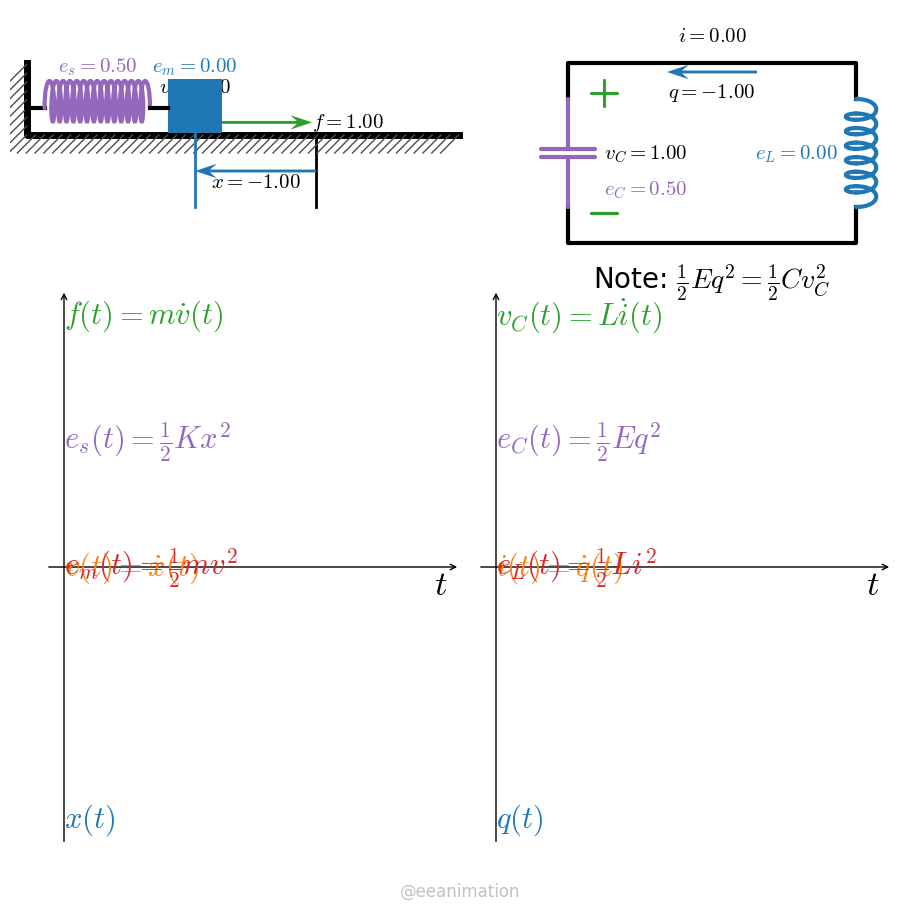

In [1]:
from matplotlib import pyplot,patches,cm,animation,path,transforms
import numpy as np
pyplot.rcParams.update({'font.family':"sans serif",'mathtext.fontset':'cm'})

#draw inductor symbol
def draw_inductor(ax,x0,y0,n,w,h,theta=0,lw=1,c='k',alpha=1):
    w= w/(0.7*n+0.3)#width of larger coil
    verts,codes = [],[]
    for k in range(n): #larger coil half
        verts += [(x0+.7*k*w,y0),(x0+.7*k*w,y0+h),(x0+(.7*k+1)*w,y0+h),(x0+(.7*k+1)*w,y0)]
        codes += [path.Path.MOVETO]+[path.Path.CURVE4]*3
    for k in range(1,n): #smaller coil half
        verts += [(x0+.7*k*w,y0),(x0+.7*k*w,y0-h/2),(x0+(.7*k+.3)*w,y0-h/2),(x0+(.7*k+.3)*w,y0)]
        codes += [path.Path.MOVETO]+[path.Path.CURVE4]*3
    rot=transforms.Affine2D().rotate_deg_around(x0,y0,theta)+ax.transData
    ax.add_patch(patches.PathPatch(path.Path(verts,codes),ec=c,alpha=alpha,fc='None',lw=lw,capstyle='round',transform=rot))
    return
#draw capacitor symbol
def draw_capacitor(ax,x0,y0,h,theta=0,lw=1,color='k',alpha=1):
    dx,dy = (.075*h, .25*h)
    verts = [(x0,y0),(x0+h/2-dx/2,y0),(x0+h/2-dx/2,y0+dy),(x0+h/2-dx/2,y0-dy),
             (x0+h,y0),(x0+h/2+dx/2,y0),(x0+h/2+dx/2,y0+dy),(x0+h/2+dx/2,y0-dy)]
    codes = [path.Path.MOVETO,path.Path.LINETO]*4
    rot=transforms.Affine2D().rotate_deg_around(x0,y0,theta)+ax.transData
    ax.add_patch(patches.PathPatch(path.Path(verts,codes),ec=color,alpha=alpha,fc='None',lw=lw,capstyle='round',transform=rot))
    return

#draw the +/- voltage polarity with variable distance/color
def draw_voltage_sign(ax,x0,y0,h,markersize=400,theta=0,lw=1,color='k'):
    rot=transforms.Affine2D().rotate_deg_around(x0,y0,theta)+ax.transData
    ax.scatter(x0-.5*h,y0,marker='$+$',s=markersize,color=color,lw=lw,transform=rot)
    ax.scatter(x0+.5*h,y0,marker='$-$',s=markersize,color=color,lw=lw,transform=rot)
    return
def clear(ax):
  xlim,ylim = ax.get_xlim(),ax.get_ylim()
  ax.cla()
  ax.set_xlim(xlim); ax.set_ylim(ylim); ax.axis('off')
  return

Nf = 600 #number of animation frames
t = np.linspace(0,2*np.pi,Nf) #time series
xy = [[-.4,.9],[.7,.85]]  #origins of the moving mass and the circuit
xy1 = [[-1.1,-.3], [.1,-.3]] #origins of the plots
lx = 1; ly = .7 #waveform size
w,n = 1.2,50; dw = w/(n-1) #width of mass-spring drawing
M,L = 1,1 #mass and inductance
K,C = 1,1 #spring constant and capacitance
dxp = w*.28 #peak value of displacement in spring-mass drawing
dx0 = w*.33
dx = -np.cos(t) #displacement
v = np.sin(t) #velocity
f = np.cos(t)*M #force
em = M/2*v**2 #kinetic energy
es = K/2*dx**2
wrec = .15 #width and height of the moving mass
wlc = .8 #width of LC circuit drawing
q = -np.cos(t) #charge
iL = np.sin(t) #current
vC = np.cos(t)*L #voltage
eL = L/2*iL**2 #magnetic energy stored in the inductance
eC = C/2*vC**2 #electric energy stored in the capacitance
h=.3 #height of the inductance and voltage source
cl = list(cm.tab10.colors) #color list
fig = pyplot.figure(figsize = ([9,9]))
ax = fig.add_axes([0,0,1,1],xlim=[-1.25,1.25],ylim=[-1.25,1.25]);ax.axis('off')
ax1 = fig.add_axes([0,0,1,1],xlim=[-1.25,1.25],ylim=[-1.25,1.25],fc='none'); ax1.axis('off')
ax.plot([xy[0][0]-(w-dx0)]*2+[xy[0][0]+dx0],[xy[0][1]+.2]+2*[xy[0][1]],lw=5,c='k')
ax.plot([xy[0][0]]*2,[xy[0][1],xy[0][1]-.2],lw=2,c='k')
[ax.plot([xy[0][0]-(w-dx0)+k*dw,xy[0][0]-(w-dx0)+k*dw-.05],[xy[0][1],xy[0][1]-.05],c='.3',lw=1) for k in range(n)]
[ax.plot([xy[0][0]-(w-dx0),xy[0][0]-(w-dx0)-.05],[xy[0][1]+k*dw,xy[0][1]+k*dw-.05],c='.3',lw=1) for k in range(1,1+int(n/6))]
[ax.annotate('',(xy1[k][0]+lx*1.1,xy1[k][1]),(xy1[k][0]-.05,xy1[k][1]),arrowprops={'arrowstyle':'->', 'color':'k', 'lw':1}) for k in range(2)]
[ax.annotate('',(xy1[k][0],xy1[k][1]+ly*1.1),(xy1[k][0],xy1[k][1]-ly*1.1),arrowprops={'arrowstyle':'->', 'color':'k'}) for k in range(2)]
[ax.text(xy1[k][0]+lx*1.1,xy1[k][1],'$t$  ',ha='right',va='top',size=25) for k in range(2)]
lines = [ax.plot([],[],c=cl[0],lw=2-k)[0] for k in range(2)]
lines += [ax.plot([],[],c=cl[k%5],lw=3)[0] for k in range(10)]
tx1 = [ax.text(0,0,'',size = 15,va=['top','center','center','bottom','bottom'][k],ha=(['center']*5)[k]) for k in range(5)]
tx1 += [ax.text(xy[1][0],xy[1][1]+[.2,.3][k],'',size = 15,ha='center',va=['top','bottom'][k]) for k in range(2)]
tx1 += [ax.text(xy[1][0]+[.1-wlc/2,wlc/2-.05,.1-wlc/2][k],xy[1][1]+[0,0,-.1][k],'',size = 15,va='center',ha=['left','right','left'][k]) for k in range(3)]
tx2 = [ax.text(0,0,[r'$x(t)$',r'$v(t)=\dot x(t)$',r'$f(t)=m\dot v(t)$',r'$e_m(t)=\frac{1}{2}mv^2$',r'$e_s(t)=\frac{1}{2}Kx^2$'][k],
             c=cl[k],size=22,va='center') for k in range(5)]
tx2 += [ax.text(0,0,[r'$q(t)$',r'$i(t)=\dot q(t)$',r'$v_C(t)=L\dot i(t)$',r'$e_L(t)=\frac{1}{2}Li^2$',r'$e_C(t)=\frac{1}{2}Eq^2$'][k],
             c=cl[k],size=22,va='center') for k in range(5)]
[ax.plot([xy[1][0]-wlc/2]*2+[xy[1][0]+wlc/2]*2,
 [xy[1][1]+h/2*(-1)**k]+[xy[1][1]+.25*(-1)**k]*2+[xy[1][1]+h/2*(-1)**k],lw=3,c='k') for k in range(2)]
ax.plot([xy[0][0]-(w-dx0),xy[0][0]-(w-dx0)+.05],[xy[0][1]+wrec/2]*2,lw=3,c='k')#spring end tie to left wall
ax.text(xy[1][0],xy[1][1]-.3,r'Note: $\frac{1}{2}Eq^2=\frac{1}{2}Cv_C^2$',size=20,ha='center',va='top')
def animate(i):
  vt,ft = v[i]*.25,f[i]*.25
  qt,iLt,vCt = q[i]/4,iL[i]/4,vC[i]/3
  dir = [np.sign(vt),np.sign(ft)]
  xt = xy[0][0]+dx[i]*dxp
  lmd = em[i]*2
  ls = (w-dx0)+dx[i]*dxp-wrec/2-.1 #spring length
  crecL = lmd*np.array(cl[3])+(1-lmd)*np.array(cl[0]) #blended color of the rectangle and inductance
  csprC = (1-lmd)*np.array(cl[4])+lmd*np.array(cl[0]) #blended color of the spring and capacitance
  clear(ax1)
  ax1.add_patch(patches.FancyArrow(xy[1][0]-qt/2,xy[1][1]+.225,qt,0,width=0.008,
              head_width=.04,length_includes_head=True,overhang=.3,fc=cl[0],lw=0,zorder=2))
  ax1.add_patch(patches.FancyArrow(xy[1][0]-iLt/2,xy[1][1]+.275,iLt,0,width=0.008,
              head_width=.04,length_includes_head=True,overhang=.3,fc=cl[1],lw=0,zorder=2))
  draw_inductor(ax1,xy[1][0]+wlc/2,xy[1][1]+h/2,7,h,h/4,theta=-90,lw=3,c=crecL) #inductance
  draw_capacitor(ax1,xy[1][0]-wlc/2,xy[1][1]-h/2,.3,theta=90,lw=3,color=csprC)
  draw_inductor(ax1,xy[0][0]-(w-dx0)+.05,xy[0][1]+wrec/2,15,ls,h/3,lw=3,c=csprC) #spring
  ax1.plot([xt-wrec/2,xt-wrec/2-.05],[xy[0][1]+wrec/2]*2,lw=3,c='k') #spring tie to the mass
  draw_voltage_sign(ax1,xy[1][0]-wlc/2+.1,xy[1][1],vCt,theta=-90,markersize=400,color=cl[2])
  ax1.add_patch(patches.Rectangle([xt-wrec/2,xy[0][1]+.005],wrec,wrec,fc = crecL,ec = 'none'))
  [ax1.add_patch(patches.FancyArrow(xt+wrec/2*dir[k],xy[0][1]+.01+wrec/2+.05*(-1)**k,[vt,ft][k],0,width = 0.008,
            head_width = .04,length_includes_head = True,overhang = .3,fc = cl[1+k],lw = 0)) for k in range(2)]
  lines[0].set_data([xt,xt],[xy[0][1]+.01+wrec/2,xy[0][1]-.2])
  ax1.add_patch(patches.FancyArrow(xy[0][0],xy[0][1]-.1,dx[i]*dxp,0,width=0.008,
              head_width=.04,length_includes_head=True,overhang=.3,fc=cl[0],lw=0,zorder=2))
  # lines[1].set_data([xy[0][0],xt],[xy[0][1]-.1,xy[0][1]-.1])
  [lines[2+k].set_data(t[:i+1]/(2*np.pi)*lx+xy1[0][0],[dx,v,f,em,es][k][:i+1]*ly+xy1[0][1]) for k in range(5)] #plots of mass-spring
  [tx2[k].set_position([t[i]/(2*np.pi)*lx+xy1[0][0],[dx,v,f,em,es][k][i]*ly+xy1[0][1]]) for k in range(5)]
  [lines[7+k].set_data(t[:i+1]/(2*np.pi)*lx+xy1[1][0],[q,iL,vC,eL,eC][k][:i+1]*ly+xy1[1][1]) for k in range(5)] #plots of inductance
  [tx2[k+5].set_position([t[i]/(2*np.pi)*lx+xy1[1][0],[q,iL,vC,eL,eC][k][i]*ly+xy1[1][1]]) for k in range(5)]
  [tx1[k].set_text([rf'$x={dx[i]:.2f}$',rf'$v = {v[i]:.2f}$',rf'$f={f[i]:.2f}$',rf'$e_m = {em[i]:.2f}$',rf'$e_s = {es[i]:.2f}$'][k]) for k in range(5)]
  [tx1[k].set_position([xt+[-dx[i]*dxp/2,wrec/2*dir[0]+vt,wrec/2*dir[1]+ft,0,-wrec/2-.05-ls/2][k],
                        xy[0][1]+[-.1,wrec/2+.06,wrec/2-.04,wrec+.01,wrec+.01][k]]) for k in range(5)]
  [tx1[3+k].set_color([crecL,csprC][k]) for k in range(2)]
  [tx1[k+1].set_ha(['center','left','right'][int(dir[k])]) for k in range(2)]
  [tx1[k+5].set_text([rf'$q={q[i]:.2f}$',rf'$i = {iL[i]:.2f}$',rf'$v_C={vC[i]:.2f}$',rf'$e_L = {eL[i]:.2f}$',
                      rf'$e_C={eC[i]:.2f}$'][k]) for k in range(5)]
  [tx1[8+k].set_color([crecL,csprC][k]) for k in range(2)]
  return
ax.text(np.average(ax.get_xlim()),ax.get_ylim()[0]*.99+ax.get_ylim()[1]*.01,r'@eeanimation',size = 12,c = '.2',alpha = .3,ha = 'center',va = 'bottom')
anim  =  animation.FuncAnimation(fig, animate, frames = Nf, interval = 50)
anim.save("MovingMassSpringInductanceCapacitance.mp4",writer = animation.FFMpegWriter(fps = 50),dpi = 200)